In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [72]:
rng = np.arange(17)
x = pd.Series(sm.tsa.arma_generate_sample(ar=[1,-.5], ma=[1], nsample=len(rng)),
             index=rng)
y = x + np.random.normal(size=len(rng))

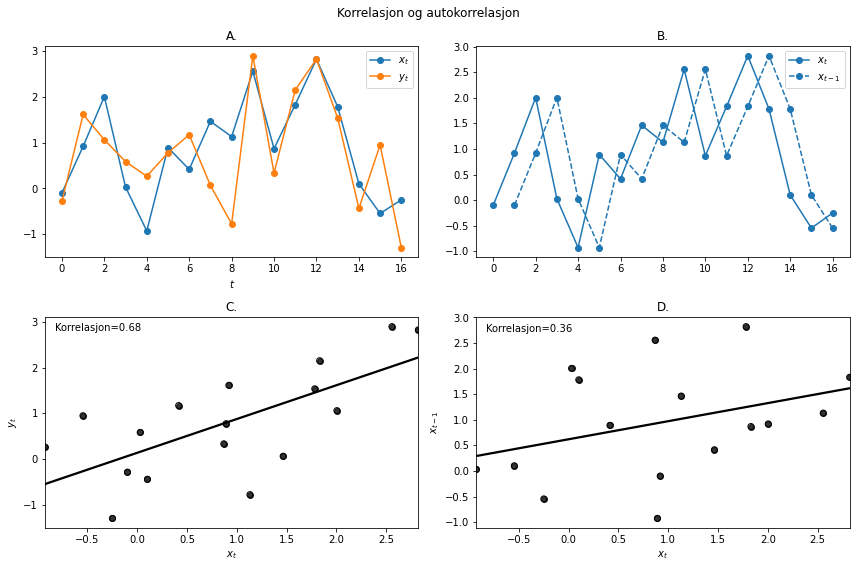

In [81]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
axes = axes.flatten()
axes[0].plot(x,'-o', label='$x_t$')
axes[0].plot(y, '-o', label='$y_t$')
axes[0].legend()
axes[0].set(xlabel='$t$')

axes[1].plot(x, '-o',label='$x_t$')
axes[1].plot(x.shift(), '--o',color='tab:blue', label='$x_{t-1}$')
axes[1].legend()

sns.regplot(x=x,y=y, ci=False,ax=axes[2], color='black')
axes[2].scatter(x,y, facecolor='none', edgecolor='black')
axes[2].text(min(x)+.1,max(y)-.1,s=f'Korrelasjon={np.corrcoef(x,y)[0,1]:.2f}')
axes[2].set(xlabel='$x_t$', ylabel='$y_t$')

sns.regplot(x=x[1:],y=x.shift()[1:], ci=False,ax=axes[3], color='black')
axes[3].scatter(x=x[1:],y=x.shift()[1:], facecolor='none', edgecolor='black')
axes[3].text(min(x)+.1,max(x.shift()[1:])-.1,s=f'Korrelasjon={np.corrcoef(x[1:],x.shift()[1:])[0,1]:.2f}')
axes[3].set(xlabel='$x_t$', ylabel='$x_{t-1}$')

subtitles=['A.','B.','C.','D.']
for i in range(4):
    axes[i].title.set_text(subtitles[i])
fig.suptitle('Korrelasjon og autokorrelasjon')
fig.tight_layout()
fig.savefig('autokorr.pdf')